In [2]:
# Imort all the required libraries
import pandas as pd
import requests
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import numpy as np
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Functions

def load_DF(url):
  data = StringIO(requests.get(url).text)
  return pd.read_csv(data)

In [4]:
# Loading Final DataSet
df = load_DF('https://raw.githubusercontent.com/mohannashahrad/Borealis_AI_Plant_Tree_Project/main/Final_Data/final_data.csv')
df = df.iloc[: , 1:]
display(df.head())

,Country,Time,Population,Pop Growth (%),Urban Pop (%),Land Area (m2),Agriculture Land (%),Forest Land (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv)
0,Afghanistan,1990,12412311.0,4.476954,21.177,652860.0,58.266703,1.850994,NaN,NaN,NaN,NaN,NaN,2960.0,15180.0
1,Afghanistan,1991,13299016.0,6.900124,21.266,652860.0,58.251386,1.850994,NaN,NaN,NaN,NaN,NaN,2740.0,15100.0
2,Afghanistan,1992,14485543.0,8.546107,21.355,652860.0,58.251386,1.850994,NaN,NaN,NaN,NaN,NaN,1430.0,13630.0
3,Afghanistan,1993,15816601.0,8.790897,21.444,652860.0,58.104341,1.850994,NaN,NaN,NaN,NaN,NaN,1360.0,13460.0
4,Afghanistan,1994,17075728.0,7.659796,21.534,652860.0,57.919003,1.850994,NaN,NaN,NaN,NaN,NaN,1300.0,13270.0


In [5]:
# One-hot encoding on Country column
discrete_columns = ["Country"]

for var in discrete_columns:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(df[[var]]).toarray())
    enc_df.columns = enc.get_feature_names([var])
    df = df.join(enc_df)
    df = df.drop([var], axis=1)

display(df.head())    

,Time,Population,Pop Growth (%),Urban Pop (%),Land Area (m2),Agriculture Land (%),Forest Land (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),...,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Vietnam,Country_Virgin Islands (U.S.),Country_West Bank and Gaza,Country_World,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
0,1990,12412311.0,4.476954,21.177,652860.0,58.266703,1.850994,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1991,13299016.0,6.900124,21.266,652860.0,58.251386,1.850994,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992,14485543.0,8.546107,21.355,652860.0,58.251386,1.850994,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993,15816601.0,8.790897,21.444,652860.0,58.104341,1.850994,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994,17075728.0,7.659796,21.534,652860.0,57.919003,1.850994,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Splitting data set into train and test
print(df.shape)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
print(df.shape)
x = df.loc[:, df.columns != 'Forest Land (%)']
y = df['Forest Land (%)']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

(8246, 280)
(6251, 280)


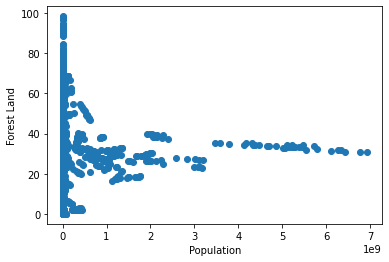

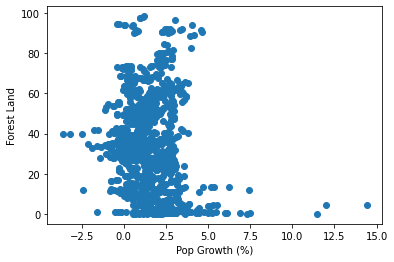

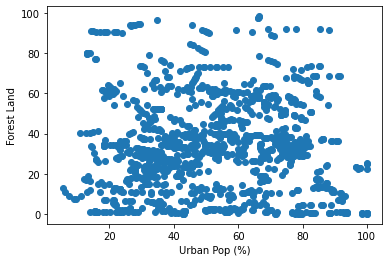

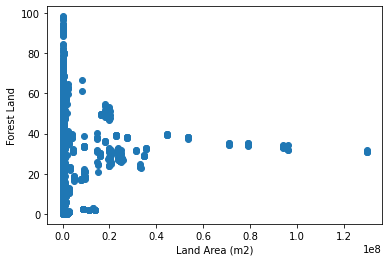

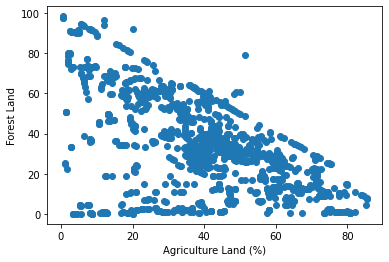

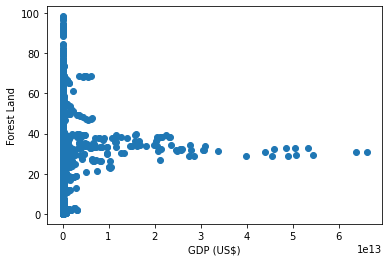

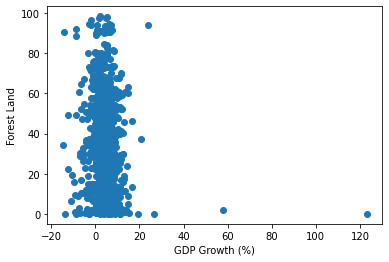

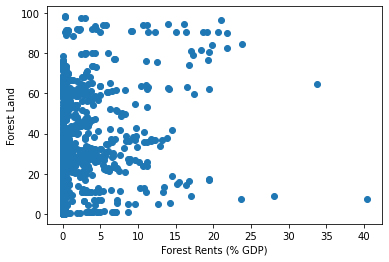

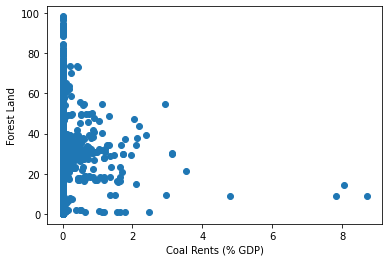

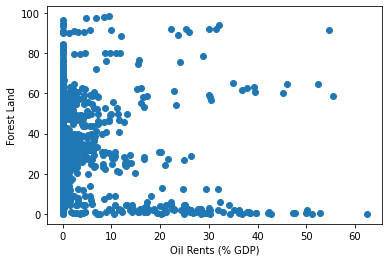

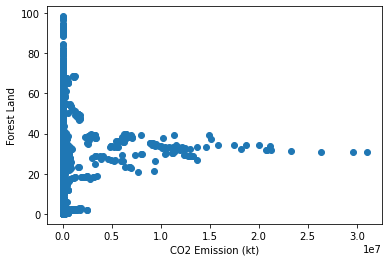

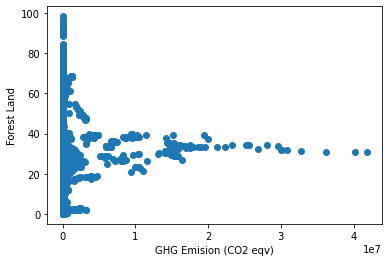

In [7]:
# Plotting 
features = ['Population', 'Pop Growth (%)', 'Urban Pop (%)', 'Land Area (m2)', 'Agriculture Land (%)', 'GDP (US$)', 
            'GDP Growth (%)', 'Forest Rents (% GDP)', 'Coal Rents (% GDP)', 'Oil Rents (% GDP)', 'CO2 Emission (kt)', 'GHG Emision (CO2 eqv)']

for f in features: 
  plt.scatter(X_test[f],y_test)
  plt.xlabel(f)
  plt.ylabel('Forest Land')
  plt.show()

In [8]:
# Training the LR Model

model = LinearRegression()  
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
display(compare_df)

,Actual,Predicted
0,31.021033,32.120773
1,6.309531,7.025079
2,2.549039,1.630963
3,60.105322,58.651414
4,24.825396,23.261180
...,...,...
1246,12.929709,12.146861
1247,49.373648,50.876633
1248,0.454484,1.286559
1249,38.888152,38.921840


In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', np.sqrt(metrics.r2_score(y_pred,y_test)))

Mean Absolute Error: 2.1529766066227207
Mean Squared Error: 11.15279067702687
Root Mean Squared Error: 3.3395794161880428
R2 score: 0.9890752585772231


In [10]:
df.head(20)

,Time,Population,Pop Growth (%),Urban Pop (%),Land Area (m2),Agriculture Land (%),Forest Land (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),...,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Vietnam,Country_Virgin Islands (U.S.),Country_West Bank and Gaza,Country_World,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
13,2003,23680871.0,4.668344,22.353000,6.528600e+05,58.067580,1.850994,4.515559e+09,8.832278,0.664331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2004,24726689.0,4.321560,22.500000,6.528600e+05,58.069111,1.850994,5.226779e+09,1.414118,0.387787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2005,25654274.0,3.682700,22.703000,6.528600e+05,58.067580,1.850994,6.209138e+09,11.229715,0.332205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2006,26433058.0,2.990524,22.907000,6.528600e+05,58.067580,1.850994,6.971286e+09,5.357403,0.454077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,2007,27100542.0,2.493830,23.113000,6.528600e+05,58.067580,1.850994,9.747880e+09,13.826320,0.342749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2008,27722281.0,2.268273,23.320000,6.528600e+05,58.067580,1.850994,1.010923e+10,3.924984,0.353698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2009,28394806.0,2.396978,23.528000,6.528600e+05,58.067580,1.850994,1.243909e+10,21.390528,0.274778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2010,29185511.0,2.746615,23.737000,6.528600e+05,58.069111,1.850994,1.585657e+10,14.362441,0.358436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2011,30117411.0,3.143106,23.948000,6.528600e+05,58.067580,1.850994,1.780429e+10,0.426355,0.309318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,2012,31161378.0,3.407600,24.160000,6.528600e+05,58.067580,1.850994,2.000160e+10,12.752287,0.263852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_2 = load_DF('https://raw.githubusercontent.com/mohannashahrad/Borealis_AI_Plant_Tree_Project/main/Final_Data/final_data2.csv')
df_2 = df_2.iloc[: , 3:]

In [39]:
df_2

,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Tree Loss (ha)
2,652860.0,379100.0,12084.4,23680871.0,4.668344,22.353,4.515559e+09,8.832278,0.664331,0.007422,0.026686,1350.0,16780.0,244.336255
3,652860.0,379110.0,12084.4,24726689.0,4.321560,22.500,5.226779e+09,1.414118,0.387787,0.016455,0.025399,1130.0,16520.0,201.444959
4,652860.0,379100.0,12084.4,25654274.0,3.682700,22.703,6.209138e+09,11.229715,0.332205,0.010904,0.025973,1640.0,17400.0,235.956834
5,652860.0,379100.0,12084.4,26433058.0,2.990524,22.907,6.971286e+09,5.357403,0.454077,0.011152,0.022144,1940.0,21040.0,152.084536
6,652860.0,379100.0,12084.4,27100542.0,2.493830,23.113,9.747880e+09,13.826320,0.342749,0.076415,0.014696,2360.0,24880.0,252.841662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,386850.0,162000.0,177210.0,13586710.0,1.754741,32.504,1.949552e+10,2.376929,3.091757,0.954875,0.000000,12150.0,29350.0,9644.693979
5314,386850.0,162000.0,176749.3,13814642.0,1.663694,32.385,1.996312e+10,1.779873,3.261928,0.495490,0.000000,12400.0,31280.0,12261.738760
5315,386850.0,162000.0,176288.6,14030338.0,1.549294,32.296,2.054868e+10,0.755869,3.342297,0.227490,0.000000,10990.0,29120.0,10955.480630
5316,386850.0,162000.0,175827.9,14236599.0,1.459406,32.237,1.901533e+10,4.699400,2.982974,0.495528,0.000000,10230.0,28800.0,25978.304550


In [30]:
df_2 = df_2[~df_2.isin([np.nan, np.inf, -np.inf]).any(1)]
x_2 = df_2.loc[:, df_2.columns != 'Tree Loss (ha)']
normalized_x_2=StandardScaler().fit_transform(x_2)
normalized_x_2=pd.DataFrame(data=normalized_x_2, columns=["Land Area (m2)", "Agriculture Land (m2)", "Forest Land (m2)", "Population", "Pop Growth (%)", "Urban Pop (%)", "GDP (US$)", "GDP Growth (%)", "Forest Rents (% GDP)", "Coal Rents (% GDP)", "Oil Rents (% GDP)", "CO2 Emission (kt)", "GHG Emision (CO2 eqv)"])
normalized_x_2.head()

,Land Area (m2),Agriculture Land (m2),Forest Land (m2),Population,Pop Growth (%),Urban Pop (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv)
0,-0.053191,0.151565,-0.280729,-0.121892,2.833507,-1.488437,-0.252053,0.966200,-0.325614,-0.195424,-0.367831,-0.225766,-0.238114
1,-0.053191,0.151580,-0.280729,-0.114761,2.540205,-1.481744,-0.251572,-0.476629,-0.391587,-0.185539,-0.367980,-0.226046,-0.238385
2,-0.053191,0.151565,-0.280729,-0.108437,1.999872,-1.472501,-0.250907,1.432500,-0.404847,-0.191614,-0.367914,-0.225396,-0.237467
3,-0.053191,0.151565,-0.280729,-0.103127,1.414446,-1.463213,-0.250391,0.290338,-0.375773,-0.191342,-0.368358,-0.225013,-0.233669
4,-0.053191,0.151565,-0.280729,-0.098576,0.994354,-1.453834,-0.248513,1.937539,-0.402332,-0.119929,-0.369223,-0.224477,-0.229663


In [38]:
y_2 = df_2['Tree Loss (ha)']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(normalized_x_2, y_2, test_size=0.2, random_state=0)
model.fit(X_train_2, y_train_2) 
y_pred_2 = model.predict(X_test_2)
compare_df_2 = pd.DataFrame({'Actual': y_test_2.to_numpy().flatten(), 'Predicted': y_pred_2.flatten()})
compare_df_2

,Actual,Predicted
0,16356.445450,4482.012758
1,57883.220930,132654.411255
2,902.670348,2260.585941
3,99820.579630,103285.221979
4,49140.154900,123542.405932
...,...,...
569,6660.339483,-11354.134177
570,7730.473436,-4326.949630
571,253840.008700,319330.353387
572,2238.446401,30202.421101


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_pred_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

Mean Absolute Error: 62169.332738820216
Mean Squared Error: 20559713864.382168
Root Mean Squared Error: 143386.588858171


In [33]:
print('R2 score:', metrics.r2_score(y_pred_2,y_test_2))

R2 score: 0.8568475601668463


In [35]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(normalized_x_2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

In [36]:
finalDf = pd.concat([principalDf, df_2['Tree Loss (ha)']], axis = 1)

In [37]:
finalDf

,principal component 1,Tree Loss (ha)
0,-0.662871,NaN
1,-0.657001,NaN
2,-0.590696,244.336255
3,-0.568013,201.444959
4,-0.503967,235.956834
...,...,...
5313,NaN,9644.693979
5314,NaN,12261.738760
5315,NaN,10955.480630
5316,NaN,25978.304550


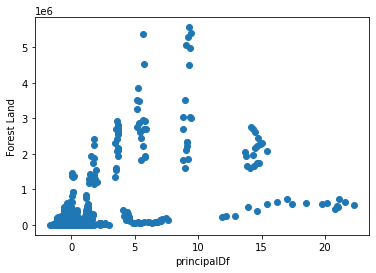

In [40]:
plt.scatter(principalDf,df_2['Tree Loss (ha)'])
plt.xlabel('principalDf')
plt.ylabel('Forest Land')
plt.show()